# DATA CLEANING

Data cleaning in Python refers to the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis or other purposes. It involves various tasks such as handling missing values, removing duplicates, correcting inaccuracies, and standardizing formats.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#load new data

df = pd.read_csv('googleplaystore.csv')

In [3]:
#view the data with ascending (by default: 5 rows only)

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#show the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Missing value: rating (float) | type, content rating, current ver, andro ver (object)

In [5]:
#view the NaN count of the data

df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

CHECK THE MISSING VALUES

In [6]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Column' : missing_values.index,
    'Missing Values' : missing_values.values,
    'Missing Percentage' : missing_percentages.values
})

print(missing_info)

            Column  Missing Values  Missing Percentage
0              App               0            0.000000
1         Category               0            0.000000
2           Rating            1474           13.596532
3          Reviews               0            0.000000
4             Size               0            0.000000
5         Installs               0            0.000000
6             Type               1            0.009224
7            Price               0            0.000000
8   Content Rating               1            0.009224
9           Genres               0            0.000000
10    Last Updated               0            0.000000
11     Current Ver               8            0.073794
12     Android Ver               3            0.027673


HANDLING THE MISSING VALUES

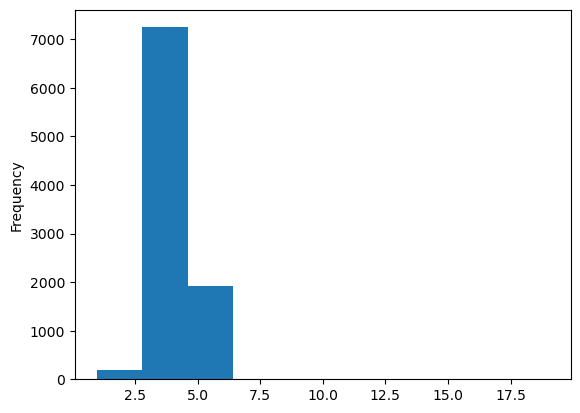

In [7]:
#show the visualization of Rating column
df.Rating.plot(kind='hist');

The data has skewness distribution, you can do an imputation the missing values by median

In [8]:
val = df.Rating.mean()
df['Rating'] = df.Rating.fillna(val)

In [9]:
#show the proportion of data

df.shape[0]

10841

In [10]:
#check value counts for categorical data

df.value_counts(['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

Type  Content Rating  Current Ver         Android Ver       
Free  Everyone        Varies with device  Varies with device    918
      Teen            Varies with device  Varies with device    174
      Everyone        1.0                 4.1 and up            148
                                          4.0 and up            105
                                          4.0.3 and up           86
                                                               ... 
                      20.1.0              5.0 and up              1
                      20.7.9.2            2.3 and up              1
                      200                 4.0.3 and up            1
                      2017.07.24          4.1 and up              1
Paid  Teen            Varies with device  Varies with device      1
Name: count, Length: 5470, dtype: int64

NOTES:

From the data above, it can be concluded that the Current Ver and the Android Ver will be dropped because both of them have unique data. It is not enough to complete the data.

In [11]:
#check the percentage of Type column
df['Type'].isna().sum()/df.shape[0]

9.224241306152569e-05

In [12]:
df.Type.value_counts()

Type
Free    10039
Paid      800
0           1
Name: count, dtype: int64

In [13]:
#cleaning for categorical data (Type)

val = df.Type.mode().values[0]
df['Type'] = df.Type.fillna(val)

In [14]:
#show the value counts again

df.Type.value_counts()

Type
Free    10040
Paid      800
0           1
Name: count, dtype: int64

In [15]:
#check the percentage of Content Rating column

df['Content Rating'].isna().sum()/df.shape[0]

9.224241306152569e-05

In [16]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [17]:
#cleaning for categorical data (Content Rating)

val = df['Content Rating'].mode().values[0]
df['Content Rating'] = df['Content Rating'].fillna(val)

In [18]:
#show the value counts again

df['Content Rating'].value_counts()

Content Rating
Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [19]:
#drop the columns

df.drop(['Current Ver', 'Android Ver'], axis=1, inplace = True)

In [20]:
#show the cleaning data

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [21]:
#check the data info after data cleansing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
dtypes: float64(1), object(10)
memory usage: 931.8+ KB


The data has been clean!